Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available.


2024-11-22 01:50:32.957841: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-22 01:50:33.487613: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:0 with 22133 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:81:00.0, compute capability: 8.9


Found 873 images belonging to 4 classes.
Found 217 images belonging to 4 classes.


2024-11-22 01:50:33.531584: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22133 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:81:00.0, compute capability: 8.9
/usr/local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50


2024-11-22 01:50:35.437597: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200
2024-11-22 01:50:36.317166: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-11-22 01:50:36.317222: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-11-22 01:50:36.317451: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


 1/28 [>.............................] - ETA: 1:26 - loss: 1.9300 - accuracy: 0.2188

2024-11-22 01:50:37.506375: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


28/28 [==============================] - ETA: 0s - loss: 1.0826 - accuracy: 0.5773
Epoch 1: val_loss improved from inf to 0.63356, saving model to best_vgg16.h5
28/28 [==============================] - 11s 292ms/step - loss: 1.0826 - accuracy: 0.5773 - val_loss: 0.6336 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 2/50
28/28 [==============================] - ETA: 0s - loss: 0.4513 - accuracy: 0.8316
Epoch 2: val_loss improved from 0.63356 to 0.35981, saving model to best_vgg16.h5
28/28 [==============================] - 7s 265ms/step - loss: 0.4513 - accuracy: 0.8316 - val_loss: 0.3598 - val_accuracy: 0.8710 - lr: 1.0000e-04
Epoch 3/50
28/28 [==============================] - ETA: 0s - loss: 0.3445 - accuracy: 0.8694
Epoch 3: val_loss improved from 0.35981 to 0.31091, saving model to best_vgg16.h5
28/28 [==============================] - 7s 265ms/step - loss: 0.3445 - accuracy: 0.8694 - val_loss: 0.3109 - val_accuracy: 0.9078 - lr: 1.0000e-04
Epoch 4/50
28/28 [========================

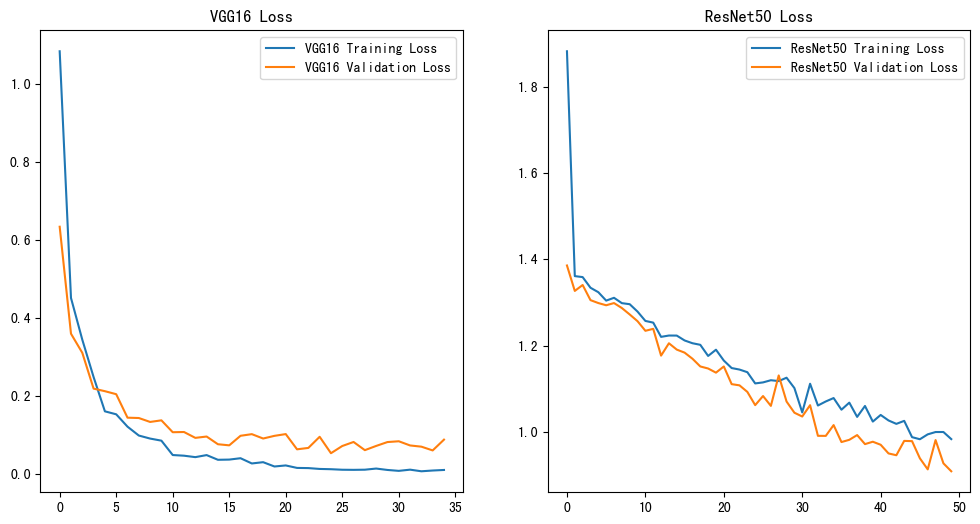

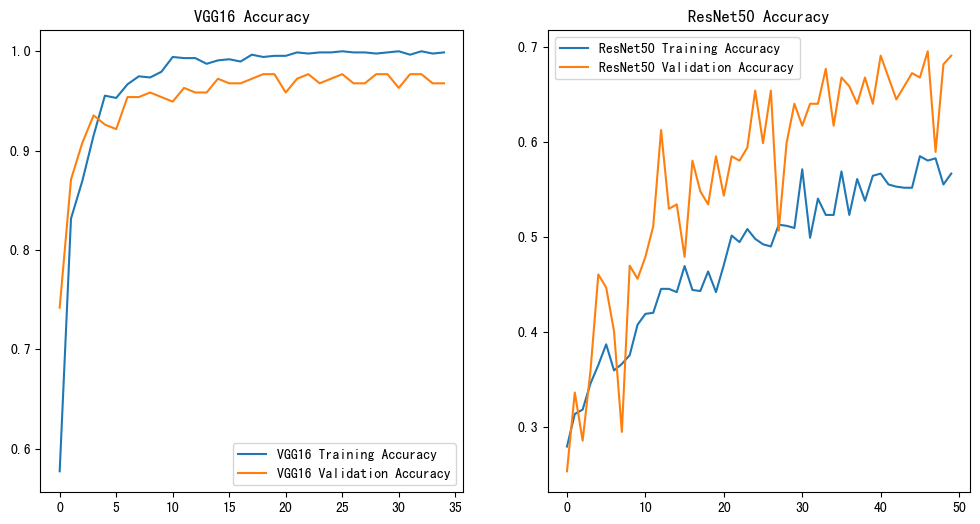

7/7 [==============================] - 2s 202ms/step - loss: 0.9008 - accuracy: 0.6866
VGG16 Loss: 0.07234720140695572, Accuracy: 0.9723502397537231
ResNet50 Loss: 0.9007779955863953, Accuracy: 0.6866359710693359

Model Comparison Report:
- VGG16 Loss: 0.07234720140695572, Accuracy: 0.9723502397537231
- ResNet50 Loss: 0.9007779955863953, Accuracy: 0.6866359710693359



In [1]:
# 导入必要的库
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

# 检查GPU是否可用
if tf.test.is_gpu_available():
    print("GPU is available.")
else:
    print("GPU is not available.")

# 数据目录
data_dir = '/openbayes/home/fruit'

# 创建ImageDataGenerator实例
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# 准备训练数据
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# 准备验证数据
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 定义VGG16模型
def create_vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(4, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 定义ResNet50模型
def create_resnet50_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(4, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 训练VGG16模型
def train_model(model, model_name):
    try:
        checkpoint = ModelCheckpoint('best_' + model_name + '.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001, verbose=1)
        
        history = model.fit(
            train_generator,
            epochs=50,
            validation_data=validation_generator,
            callbacks=[checkpoint, early_stopping, reduce_lr]
        )
        
        return history
    except Exception as e:
        print(f"Error occurred during training {model_name}: {e}")

# 训练VGG16和ResNet50模型
vgg16_history = train_model(create_vgg16_model(), 'vgg16')
resnet50_history = train_model(create_resnet50_model(), 'resnet50')

# 绘制训练和验证损失图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(vgg16_history.history['loss'], label='VGG16 Training Loss')
plt.plot(vgg16_history.history['val_loss'], label='VGG16 Validation Loss')
plt.title('VGG16 Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(resnet50_history.history['loss'], label='ResNet50 Training Loss')
plt.plot(resnet50_history.history['val_loss'], label='ResNet50 Validation Loss')
plt.title('ResNet50 Loss')
plt.legend()
plt.show()

# 绘制训练和验证准确率图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(vgg16_history.history['accuracy'], label='VGG16 Training Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='VGG16 Validation Accuracy')
plt.title('VGG16 Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(resnet50_history.history['accuracy'], label='ResNet50 Training Accuracy')
plt.plot(resnet50_history.history['val_accuracy'], label='ResNet50 Validation Accuracy')
plt.title('ResNet50 Accuracy')
plt.legend()
plt.show()

# 模型评估
vgg16_model = tf.keras.models.load_model('best_vgg16.h5')
resnet50_model = tf.keras.models.load_model('best_resnet50.h5')

vgg16_loss, vgg16_accuracy = vgg16_model.evaluate(validation_generator)
resnet50_loss, resnet50_accuracy = resnet50_model.evaluate(validation_generator)

print(f"VGG16 Loss: {vgg16_loss}, Accuracy: {vgg16_accuracy}")
print(f"ResNet50 Loss: {resnet50_loss}, Accuracy: {resnet50_accuracy}")

# 生成分析报告
report = f"""
Model Comparison Report:
- VGG16 Loss: {vgg16_loss}, Accuracy: {vgg16_accuracy}
- ResNet50 Loss: {resnet50_loss}, Accuracy: {resnet50_accuracy}
"""

print(report)

验证

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model

# 加载模型
model = load_model('best_vgg16.h5')  # 或者 'best_resnet50.h5' 如果您想使用ResNet50

# 定义类别名称
class_names = ['apple', 'banana', 'cherry', 'date']

# 图像路径
_img_path = "apple/apple101.jpg"

# 加载和预处理图像
img = image.load_img(_img_path, target_size=(224, 224))  # 确保目标大小与模型输入匹配
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # 增加批次维度
img_array = preprocess_input(img_array)  # 使用与训练时相同的预处理

# 进行预测
predictions = model.predict(img_array)

# 获取最可能的类别的索引
predicted_class_index = np.argmax(predictions[0])

# 获取预测类别的名称和置信度
predicted_class = class_names[predicted_class_index]
confidence = predictions[0][predicted_class_index]

print(f"Predicted class: {predicted_class} with confidence: {confidence:.2f}")

Predicted class: apple with confidence: 1.00


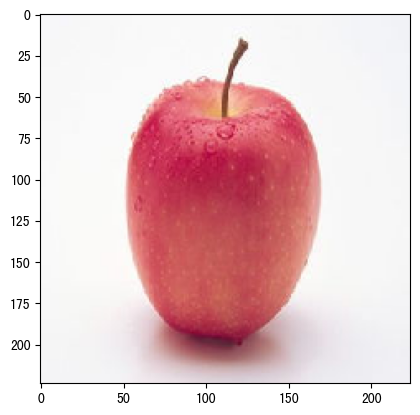

In [11]:
plt.imshow(img, cmap='gray')
plt.show()

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model

# 加载模型
model = load_model('best_resnet50.h5')  # 或者 'best_resnet50.h5' 如果您想使用ResNet50

# 定义类别名称
class_names = ['apple', 'banana', 'cherry', 'date']

# 图像路径
_img_path = "orange/orange104.jpg"

# 加载和预处理图像
img = image.load_img(_img_path, target_size=(224, 224))  # 确保目标大小与模型输入匹配
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # 增加批次维度
img_array = preprocess_input(img_array)  # 使用与训练时相同的预处理

# 进行预测
predictions = model.predict(img_array)

# 获取最可能的类别的索引
predicted_class_index = np.argmax(predictions[0])

# 获取预测类别的名称和置信度
predicted_class = class_names[predicted_class_index]
confidence = predictions[0][predicted_class_index]

print(f"Predicted class: {predicted_class} with confidence: {confidence:.2f}")

Predicted class: cherry with confidence: 1.00


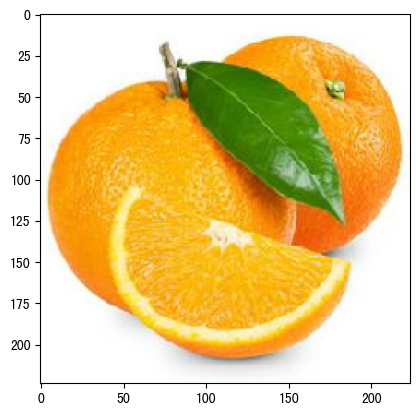

In [13]:
plt.imshow(img, cmap='gray')
plt.show()